*Import the google drive to save and load data*

In [96]:
import os
print("Files in the current directory:", os.listdir('/content'))
from google.colab import drive
drive.mount('/content/drive')

Files in the current directory: ['.config', 'drive', 'sample_data']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Download the neccessary libraries*

In [97]:
!pip install rasterio

*After that upload trhe Testing and Training folder to the given path*

In [98]:
import numpy as np
X_train = np.load('/content/drive/MyDrive/MySentinel/Dataset/Training/training_features.npy')
y_train = np.load('/content/drive/MyDrive/MySentinel/Dataset/Training/training_labels.npy')
X_test = np.load('/content/drive/MyDrive/MySentinel/Dataset/Testing/testing_features.npy')
y_test = np.load('/content/drive/MyDrive/MySentinel/Dataset/Testing/testing_labels.npy')

*Let's see how many data we are working with, usually we have 4times more for training than testing*

In [99]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype)

(12000, 5, 5, 4)
(12000,)
(3000, 5, 5, 4)
(3000,)
uint16 int32 float32 int32


*Let's take a closer look*

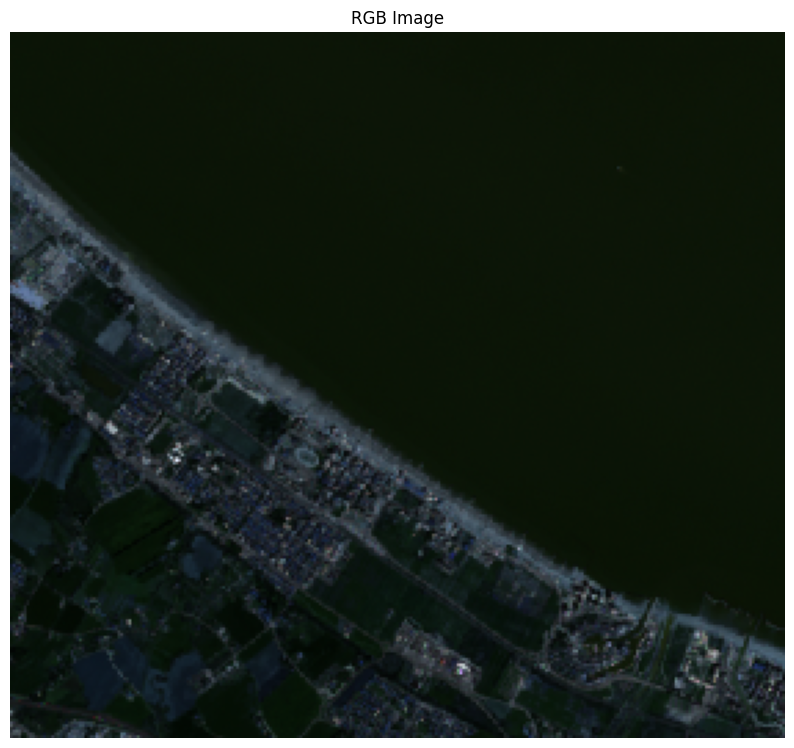

In [137]:
import rasterio
import matplotlib.pyplot as plt

raster_path = '/content/drive/MyDrive/MySentinel/Dataset/Training_photo/output_combined_bands.tif'

with rasterio.open(raster_path) as src:
    band_red = src.read(1)
    band_green = src.read(2)
    band_blue = src.read(3)
    rgb_image = np.dstack((band_red, band_green, band_blue))

    rgb_image = rgb_image / rgb_image.max()

    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.title('RGB Image')
    plt.axis('off')
    plt.show()


*Let's turn this data into a matrix*

In [138]:
with rasterio.open(raster_path) as src:
    band_red = src.read(1)
    band_green = src.read(2)
    band_blue = src.read(3)
    band_infra = src.read(4)

print(band_red[:5, :5])
print(band_red.shape)

print(band_green[:5, :5])
print(band_green.shape)

print(band_blue[:5, :5])
print(band_blue.shape)

print(band_infra[:5, :5])
print(band_infra.shape)

[[2150 2209 2261 2077 2300]
 [2038 2071 2189 2182 2287]
 [2143 2018 2084 2104 2123]
 [1992 1822 2012 2005 2150]
 [1973 2189 1973 2032 2222]]
(256, 281)
[[4076 3985 4011 4037 3985]
 [4116 3985 4102 4044 4050]
 [3899 4011 4063 4011 3873]
 [3945 4024 3978 3985 4050]
 [3834 4037 3919 4024 4037]]
(256, 281)
[[1206 1291 1284 1245 1239]
 [1278 1337 1304 1206 1284]
 [1219 1239 1284 1258 1298]
 [1258 1271 1265 1265 1167]
 [1265 1258 1298 1239 1127]]
(256, 281)
[[157 183 183 190 197]
 [164 164 177 183 183]
 [118 164 170 177 183]
 [125 170 203 157 170]
 [138 177 190 164 157]]
(256, 281)


In [136]:
path = '/content/drive/MyDrive/MySentinel/Dataset/Training_photo/Foto3.tif'
band_2_path = '/content/drive/MyDrive/MySentinel/Dataset/Training_photo/band1.tif'  # Blue band
band_3_path = '/content/drive/MyDrive/MySentinel/Dataset/Training_photo/band2.tif'  # Green band
band_4_path = '/content/drive/MyDrive/MySentinel/Dataset/Training_photo/band3.tif'  # Red band
band_8_path = '/content/drive/MyDrive/MySentinel/Dataset/Training_photo/band4.tif'  # NIR band

# Open the bands using rasterio
with rasterio.open(band_2_path) as b2, \
     rasterio.open(band_3_path) as b3, \
     rasterio.open(band_4_path) as b4, \
     rasterio.open(band_8_path) as b8:

    band_2 = b2.read(1)
    band_3 = b3.read(1)
    band_4 = b4.read(1)
    band_8 = b8.read(1)

    bands_stack = np.stack([band_2, band_3, band_4, band_8], axis=-1)

    metadata = b2.meta
    metadata.update(count=4)
output_path = '/content/drive/MyDrive/MySentinel/Dataset/Training_photo/output_combined_bands.tif'
with rasterio.open(output_path, 'w', **metadata) as dst:
    for i in range(4):  # Loop through the four bands
        dst.write(bands_stack[:, :, i], i + 1)

print(f"Multi-band TIFF created at: {output_path}")

Multi-band TIFF created at: /content/drive/MyDrive/MySentinel/Dataset/Training_photo/output_combined_bands.tif
